## Date set link
## https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring?select=fifa21+raw+data+v2.csv

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [5]:
path = '../All_data_sets/practice/fifa21 raw data v2.csv'

In [6]:
df = pd.read_csv( path  )

In [7]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [8]:
df.shape

(18979, 77)

## dataset cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

## Rename the columns

In [10]:
import re

pattern =r'[^a-zA-Z0-9 ]'

In [11]:
columns = df.columns

columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [12]:
df.columns = [ '_'.join( re.sub(pattern, '',  col).split() ).lower() for col in df.columns]

df.columns

Index(['id', 'name', 'longname', 'photourl', 'playerurl', 'nationality', 'age',
       'ova', 'pot', 'club', 'contract', 'positions', 'height', 'weight',
       'preferred_foot', 'bov', 'best_position', 'joined', 'loan_date_end',
       'value', 'wage', 'release_clause', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'wf', 'sm', 'aw', 'dw', 'ir', 'pac', 'sho', 'pas', 'dri',
       'def', 'phy

In [13]:
df.head(2)

,id,name,longname,photourl,playerurl,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562


In [14]:
drop_cols = [ 'id','name','photourl','playerurl' ]

## drop not requiredb columns

In [15]:
df.drop( columns=drop_cols , inplace=True )

df.head(2)

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits
0,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562


In [16]:
df.duplicated().sum()

0

## There no duplicates

In [17]:
df.head(2)

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits
0,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562


In [18]:
len(df['longname'].unique())

18852

In [19]:
df.shape

(18979, 73)

## working with name column

In [20]:
df.drop_duplicates( subset=['longname'] , inplace=True )

df.head(5)

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits
0,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [21]:
df.shape

(18852, 73)

In [22]:
df['longname'] = df['longname'].apply( lambda name : re.sub( r'[^a-zA-Z ]','',name ) )

df.head(3)

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits
0,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150


## working with nationality

In [23]:
df['nationality'].unique()

array(['Argentina', 'Portugal', 'Slovenia', 'Belgium', 'Brazil', 'Poland',
       'Egypt', 'France', 'Germany', 'Netherlands', 'Senegal', 'Spain',
       'England', 'Scotland', 'Korea Republic', 'Costa Rica', 'Italy',
       'Gabon', 'Croatia', 'Uruguay', 'Switzerland', 'Serbia', 'Slovakia',
       'Morocco', 'Algeria', 'Denmark', 'Hungary', 'Bosnia Herzegovina',
       'Nigeria', 'Cameroon', 'Norway', 'Ghana', 'Mexico', 'Austria',
       'Albania', 'Colombia', 'Chile', 'Ivory Coast', 'Greece', 'Finland',
       'Wales', 'Sweden', 'Togo', 'Czech Republic', 'Russia', 'Venezuela',
       'Canada', 'United States', 'Guinea', 'Montenegro', 'Israel',
       'Republic of Ireland', 'Ukraine', 'Turkey', 'Ecuador', 'Jamaica',
       'DR Congo', 'Australia', 'China PR', 'Armenia', 'Northern Ireland',
       'North Macedonia', 'Kosovo', 'Mali', 'Peru',
       'Central African Republic', 'Iceland', 'Burkina Faso', 'Paraguay',
       'Japan', 'Romania', 'New Zealand', 'Iran', 'Angola', 'Tunisia',
 

## nationality column does not have anything messy

In [24]:
df.head(3)

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits
0,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18852 entries, 0 to 18978
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   longname          18852 non-null  object
 1   nationality       18852 non-null  object
 2   age               18852 non-null  int64 
 3   ova               18852 non-null  int64 
 4   pot               18852 non-null  int64 
 5   club              18852 non-null  object
 6   contract          18852 non-null  object
 7   positions         18852 non-null  object
 8   height            18852 non-null  object
 9   weight            18852 non-null  object
 10  preferred_foot    18852 non-null  object
 11  bov               18852 non-null  int64 
 12  best_position     18852 non-null  object
 13  joined            18852 non-null  object
 14  loan_date_end     1003 non-null   object
 15  value             18852 non-null  object
 16  wage              18852 non-null  object
 17  release_clause   

## working with club 

In [26]:
df['club'].unique()

array(['\n\n\n\nFC Barcelona', '\n\n\n\nJuventus',
       '\n\n\n\nAtlético Madrid', '\n\n\n\nManchester City',
       '\n\n\n\nParis Saint-Germain', '\n\n\n\nFC Bayern München',
       '\n\n\n\nLiverpool', '\n\n\n\nReal Madrid', '\n\n\n\nChelsea',
       '\n\n\n\nTottenham Hotspur', '\n\n\n\nInter', '\n\n\n\nNapoli',
       '\n\n\n\nBorussia Dortmund', '\n\n\n\nManchester United',
       '\n\n\n\nArsenal', '\n\n\n\nLazio', '\n\n\n\nLeicester City',
       '\n\n\n\nBorussia Mönchengladbach', '\n\n\n\nReal Sociedad',
       '\n\n\n\nAtalanta', '\n\n\n\nOlympique Lyonnais', '\n\n\n\nMilan',
       '\n\n\n\nVillarreal CF', '\n\n\n\nRB Leipzig', '\n\n\n\nCagliari',
       '\n\n\n\nAjax', '\n\n\n\nSL Benfica', '\n\n\n\nAS Monaco',
       '\n\n\n\nWolverhampton Wanderers', '\n\n\n\nEverton',
       '\n\n\n\nFiorentina', '\n\n\n\nFC Porto', '\n\n\n\nRC Celta',
       '\n\n\n\nTorino', '\n\n\n\nSevilla FC', '\n\n\n\nGrêmio',
       '\n\n\n\nReal Betis', '\n\n\n\nRoma', '\n\n\n\nNewcastle Unite

In [27]:
## r'[\n\r\t]' removes newline (\n), carriage return (\r), and tab (\t) characters.

## .strip() removes extra spaces from the start and end of the string after cleanup.

In [28]:
df['club'] = df['club'].apply(lambda club: re.sub(r'[\n\r\t]', '', club).strip())

In [29]:
df.head(3)

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150


## Working with contract columns

In [30]:
df['contract'].unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [31]:
def clean_contract(entry):
    # If it matches year range like '2004 ~ 2021', keep as is
    if re.match(r'^\d{4} ~ \d{4}$', entry):
        return entry
    
    # If it's a loan with date in format like 'Jun 30, 2021 On Loan'
    loan_match = re.search(r'(\w{3} \d{1,2}, \d{4}) On Loan', entry)
    if loan_match:
        # Convert the date portion to year only or mark as loan
        loan_year = pd.to_datetime(loan_match.group(1)).year
        return f"Loan since {loan_year}"
    
    # If 'Free', keep as 'Free' or any desired label
    if entry.strip().lower() == 'free':
        return 'Free'
    
    # Otherwise, return NaN or original (clean as unknown)
    return pd.NA

In [32]:
df['contract'] = df['contract'].apply( lambda contract: clean_contract(contract) )

In [33]:
df.head()

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,Neymar da Silva Santos Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


## working with positions

In [34]:
df['positions']

0        RW, ST, CF
1            ST, LW
2                GK
3           CAM, CM
4           LW, CAM
            ...    
18974            CB
18975            CM
18976            CM
18977            RW
18978        CB, LB
Name: positions, Length: 18852, dtype: object

In [35]:
# Allowed positions (example typical football/soccer positions)
allowed_positions = {'GK', 'CB', 'LB', 'RB', 'CM', 'CAM', 'RW', 'LW', 'ST', 'CF'}

def clean_positions(pos_str):
    # Split by comma
    positions = pos_str.split(',')
    
    # Trim whitespace and filter allowed positions
    cleaned = [pos.strip().upper() for pos in positions if pos.strip().upper() in allowed_positions]
    
    # Join back with standardized ', ' delimiter
    return ', '.join(cleaned)


In [36]:
df['positions'] = df['positions'].apply(clean_positions)

In [37]:
df.head(3)

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150


## working with height

In [38]:
df['height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [39]:
def handle_height(height):
    
    height = height.strip()
    
    if pd.isna(height):
        return pd.NA

    # Case 1: Values already in centimeters
    cm_match = re.match(r'(\d+)\s*cm', str(height))
    if cm_match:
        return float(cm_match.group(1))

    # Case 2: Height in feet and inches (like 6'2" or 5'11)
    ft_in_match = re.match(r"(\d+)'\s*(\d+)?", str(height))
    if ft_in_match:
        feet = int(ft_in_match.group(1))
        inches = int(ft_in_match.group(2)) if ft_in_match.group(2) else 0
        return round((feet * 12 + inches) * 2.54, 1)

    # Case 3: Unknown or invalid format
    return pd.NA


df['height_cm'] = df['height'].apply(handle_height)


## Working with Weight column

In [40]:
df['weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [41]:
def handle_weight(weight):
    weight = weight.strip()
    
    if( pd.isna(weight) ): 
        return pd.NA
    
    # check the kgs
    kgs = re.match( r"(\d+)\s*kg" , str(weight) )
    if(kgs):
        return float( kgs.group(1) )
        
    # check the lbs
    lbs = re.match( r"(\d+)\s*lbs" , str(weight) )
    if(lbs):
        temp = float( lbs.group(1) )
        return round(temp * 0.453592, 1) 
        
    return pd.NA


df['weight_kg'] = df['weight'].apply(handle_weight)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18852 entries, 0 to 18978
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longname          18852 non-null  object 
 1   nationality       18852 non-null  object 
 2   age               18852 non-null  int64  
 3   ova               18852 non-null  int64  
 4   pot               18852 non-null  int64  
 5   club              18852 non-null  object 
 6   contract          18852 non-null  object 
 7   positions         18852 non-null  object 
 8   height            18852 non-null  object 
 9   weight            18852 non-null  object 
 10  preferred_foot    18852 non-null  object 
 11  bov               18852 non-null  int64  
 12  best_position     18852 non-null  object 
 13  joined            18852 non-null  object 
 14  loan_date_end     1003 non-null   object 
 15  value             18852 non-null  object 
 16  wage              18852 non-null  object 
 17

In [43]:
df.head()

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,170.0,72.0
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,187.0,83.0
2,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,188.0,87.0
3,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207,181.0,70.0
4,Neymar da Silva Santos Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595,175.0,68.0


## Working with column joined

In [44]:
df['joined'] = pd.to_datetime( df['joined'] , errors='coerce' )

In [45]:
df.head(3)

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,170.0,72.0
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,187.0,83.0
2,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,188.0,87.0


## Working with column loan_date_end

In [46]:
df['loan_date_end'].isna().sum()

17849

In [47]:
df[df['loan_date_end'].isna()]

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,170.0,72.0
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,187.0,83.0
2,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,188.0,87.0
3,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207,181.0,70.0
4,Neymar da Silva Santos Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595,175.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,Ao Xia,China PR,21,47,55,Wuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,49,CB,2018-07-13,NaN,€100K,€1K,€70K,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2 ★,2★,Medium,Medium,1 ★,64,28,26,38,48,51,NaN,178.0,66.0
18975,Ben Hough,England,17,47,67,Oldham Athletic,2020 ~ 2021,CM,175cm,65kg,Right,51,CAM,2020-08-01,NaN,€130K,€500,€165K,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2 ★,2★,Medium,Medium,1 ★,64,40,48,49,35,45,NaN,175.0,65.0
18976,Ronan McKinley,England,18,47,65,Derry City,2019 ~ 2020,CM,179cm,74kg,Right,49,CAM,2019-03-08,NaN,€120K,€500,€131K,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,2 ★,2★,Medium,Medium,1 ★,63,39,44,46,40,53,NaN,179.0,74.0
18977,Zhenao Wang,China PR,20,47,57,Dalian YiFang FC,2020 ~ 2022,RW,175cm,69kg,Right,48,ST,2020-09-22,NaN,€100K,€2K,€88K,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,3 ★,2★,Medium,Medium,1 ★,58,49,41,49,30,44,NaN,175.0,69.0


## loan_date_end has missing values

In [48]:
df['loan_date_end'].unique()

array([nan, 'Jun 30, 2021', 'Dec 31, 2020', 'Jan 30, 2021',
       'Jun 30, 2022', 'May 31, 2021', 'Jul 5, 2021', 'Dec 31, 2021',
       'Jul 1, 2021', 'Jan 1, 2021', 'Aug 31, 2021', 'Jan 31, 2021',
       'Dec 30, 2021', 'Jun 23, 2021', 'Jan 3, 2021', 'Nov 27, 2021',
       'Jan 17, 2021', 'Jun 30, 2023', 'Jul 31, 2021', 'Nov 22, 2020',
       'May 31, 2022', 'Dec 30, 2020', 'Jan 4, 2021', 'Nov 30, 2020',
       'Aug 1, 2021'], dtype=object)

In [49]:
x = pd.to_datetime( df['loan_date_end'] , errors='coerce' )

x.unique()

<DatetimeArray>
[                'NaT', '2021-06-30 00:00:00', '2020-12-31 00:00:00',
 '2021-01-30 00:00:00', '2022-06-30 00:00:00', '2021-05-31 00:00:00',
 '2021-07-05 00:00:00', '2021-12-31 00:00:00', '2021-07-01 00:00:00',
 '2021-01-01 00:00:00', '2021-08-31 00:00:00', '2021-01-31 00:00:00',
 '2021-12-30 00:00:00', '2021-06-23 00:00:00', '2021-01-03 00:00:00',
 '2021-11-27 00:00:00', '2021-01-17 00:00:00', '2023-06-30 00:00:00',
 '2021-07-31 00:00:00', '2020-11-22 00:00:00', '2022-05-31 00:00:00',
 '2020-12-30 00:00:00', '2021-01-04 00:00:00', '2020-11-30 00:00:00',
 '2021-08-01 00:00:00']
Length: 25, dtype: datetime64[ns]

In [50]:
df.head(3)

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,170.0,72.0
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,187.0,83.0
2,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,188.0,87.0


## working with value,wage,release_clause columns

In [51]:
def convert_to_price(price):
    
    price = price.strip().lower()
    
    if( price == '' ): 
        return np.nan

    price = price[1:]

    value = price[:-1].strip()
    
    m_k = price[-1:]

    if(m_k == ''):
        if(value ==''):
            return np.nan
        return round( float(value) , 3 )

    if(m_k == 'k'):
        if( value == ''):
            return 1000
        
        return round( float( value ) * 1000 , 3 )
    else :
        if( value == ''):
            return 1000000
            
        return round( float( value ) * 1000000 , 3 )
    
    return round( float( value ), 3 )

In [52]:
df['value'] = df['value'].apply(convert_to_price)

In [53]:
df['wage'] = df['wage'].apply(convert_to_price)

In [54]:
df['release_clause'] = df['release_clause'].apply(convert_to_price)

In [55]:
df.head(2)

,longname,nationality,age,ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,wf,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaN,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,170.0,72.0
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaN,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,187.0,83.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18852 entries, 0 to 18978
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   longname          18852 non-null  object        
 1   nationality       18852 non-null  object        
 2   age               18852 non-null  int64         
 3   ova               18852 non-null  int64         
 4   pot               18852 non-null  int64         
 5   club              18852 non-null  object        
 6   contract          18852 non-null  object        
 7   positions         18852 non-null  object        
 8   height            18852 non-null  object        
 9   weight            18852 non-null  object        
 10  preferred_foot    18852 non-null  object        
 11  bov               18852 non-null  int64         
 12  best_position     18852 non-null  object        
 13  joined            18852 non-null  datetime64[ns]
 14  loan_date_end     1003 non-

## handling wf,sm,aw,dw,ir columns

In [57]:
df['wf'].unique()

array(['4 ★', '3 ★', '5 ★', '2 ★', '1 ★'], dtype=object)

In [58]:
df['sm'].unique()

array(['4★', '5★', '1★', '2★', '3★'], dtype=object)

In [59]:
df['aw'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [60]:
df['dw'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [61]:
df['ir'].unique()

array(['5 ★', '3 ★', '4 ★', '2 ★', '1 ★'], dtype=object)

In [62]:
def handling_rating(rating):
    rating = rating.strip()
    
    if(rating == ''):
        return null
        
    return int(rating[0:1])

In [63]:
df['wf_rating'] = df['wf'].apply(handling_rating)

In [64]:
df['sm_rating'] = df['sm'].apply(handling_rating)

In [65]:
df['ir_rating'] = df['ir'].apply(handling_rating)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18852 entries, 0 to 18978
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   longname          18852 non-null  object        
 1   nationality       18852 non-null  object        
 2   age               18852 non-null  int64         
 3   ova               18852 non-null  int64         
 4   pot               18852 non-null  int64         
 5   club              18852 non-null  object        
 6   contract          18852 non-null  object        
 7   positions         18852 non-null  object        
 8   height            18852 non-null  object        
 9   weight            18852 non-null  object        
 10  preferred_foot    18852 non-null  object        
 11  bov               18852 non-null  int64         
 12  best_position     18852 non-null  object        
 13  joined            18852 non-null  datetime64[ns]
 14  loan_date_end     1003 non-

In [67]:
df.shape

(18852, 78)

In [68]:
drop_cols = ['height','weight','wf','sm','ir']

In [69]:
df.drop(columns=drop_cols , inplace=True)

In [70]:
df.shape

(18852, 73)

### EDA

In [71]:
nationality = dict(df['nationality'].value_counts())
top_n = 10
x = list(nationality.keys())[0:top_n]
y = list(nationality.values())[0:top_n]
print( x )
print( y )

['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Japan', 'Netherlands', 'Italy', 'Sweden']
[1684, 1193, 1065, 998, 930, 887, 483, 438, 387, 379]


## Top 10 countries having the large number of players

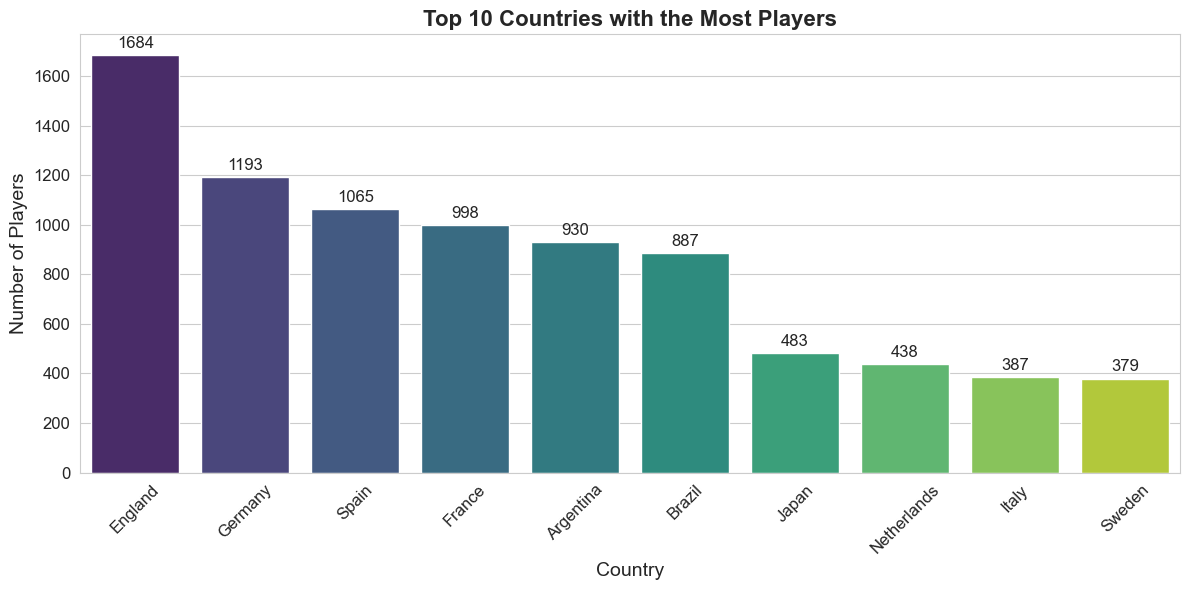

In [72]:
# Set Seaborn style and palette
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", top_n)

# Create the plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=x, y=y, palette=palette)

# Add title and labels with enhanced styles
plt.title('Top 10 Countries with the Most Players', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of bars
for i, val in enumerate(y):
    barplot.text(i, val + max(y)*0.01, str(val), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [73]:
df.head(2)

,longname,nationality,age,ova,pot,club,contract,positions,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,aw,dw,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg,wf_rating,sm_rating,ir_rating
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",Left,93,RW,2004-07-01,NaN,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,Medium,Low,85,92,91,95,38,65,771,170.0,72.0,4,4,5
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",Right,92,ST,2018-07-10,NaN,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,High,Low,89,93,81,89,35,77,562,187.0,83.0,4,5,5


## Age group distribution

In [74]:
# Define bins and labels for age categories
bins = [ 0, 30, 40,100] 
labels = ['Young Players', 'Middle Age Players', 'Old Players']

# Create a new column 'age_group' with categories
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True )

df['age_group'].value_counts()

age_group
Young Players         16067
Middle Age Players     2771
Old Players              14
Name: count, dtype: int64

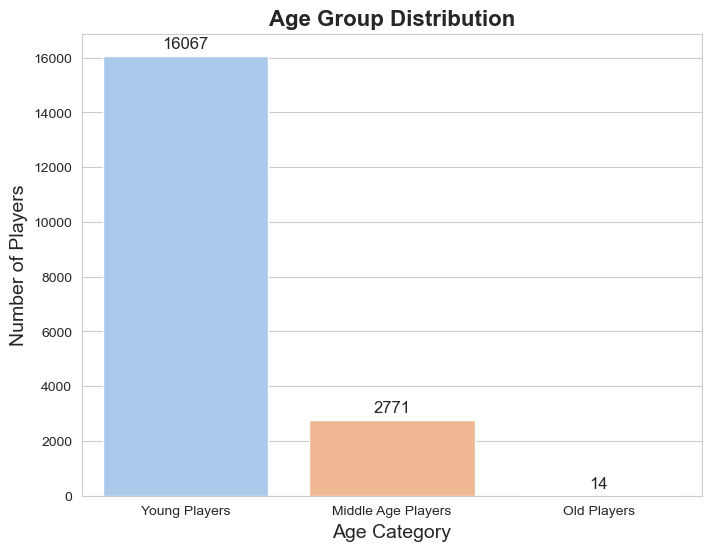

In [75]:
age_counts = df['age_group'].value_counts().sort_index()

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(x=age_counts.index, y=age_counts.values, palette="pastel")

plt.title("Age Group Distribution", fontsize=16, weight='bold')
plt.xlabel("Age Category", fontsize=14)
plt.ylabel("Number of Players", fontsize=14)

for i, count in enumerate(age_counts.values):
    ax.text(i, count + max(age_counts.values)*0.01, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

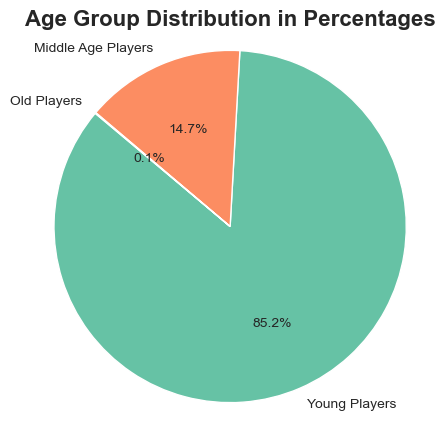

In [76]:
plt.figure(figsize=(5, 5))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5','#fc8d62','#8da0cb'])
plt.title('Age Group Distribution in Percentages', fontsize=16, weight='bold')
plt.axis('equal')  
plt.show()

In [77]:
df.head(2)

,longname,nationality,age,ova,pot,club,contract,positions,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,aw,dw,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg,wf_rating,sm_rating,ir_rating,age_group
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",Left,93,RW,2004-07-01,NaN,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,Medium,Low,85,92,91,95,38,65,771,170.0,72.0,4,4,5,Middle Age Players
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",Right,92,ST,2018-07-10,NaN,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,High,Low,89,93,81,89,35,77,562,187.0,83.0,4,5,5,Middle Age Players


## Grouping the club with wage to find the total amount spend on all the players and on average of each player

In [78]:
club = df[['club','wage']].groupby('club')['wage'].agg(['sum','mean'])

## Total amount spend by club in all the players

In [79]:
wage_summary = club.sort_values(by='sum', ascending=False)

wage_summary.head(5)

,sum,mean
club,,
Dynamo Kyiv,1.725002e+09,6.160721e+07
Club Libertad,1.655002e+09,5.516673e+07
Panathinaikos FC,1.615000e+09,5.767857e+07
Peñarol,1.600003e+09,5.517252e+07
Barcelona Sporting Club,1.595000e+09,5.316667e+07


In [80]:
x = list(wage_summary.index[0:10])
y = wage_summary['sum'].values[0 : 10]

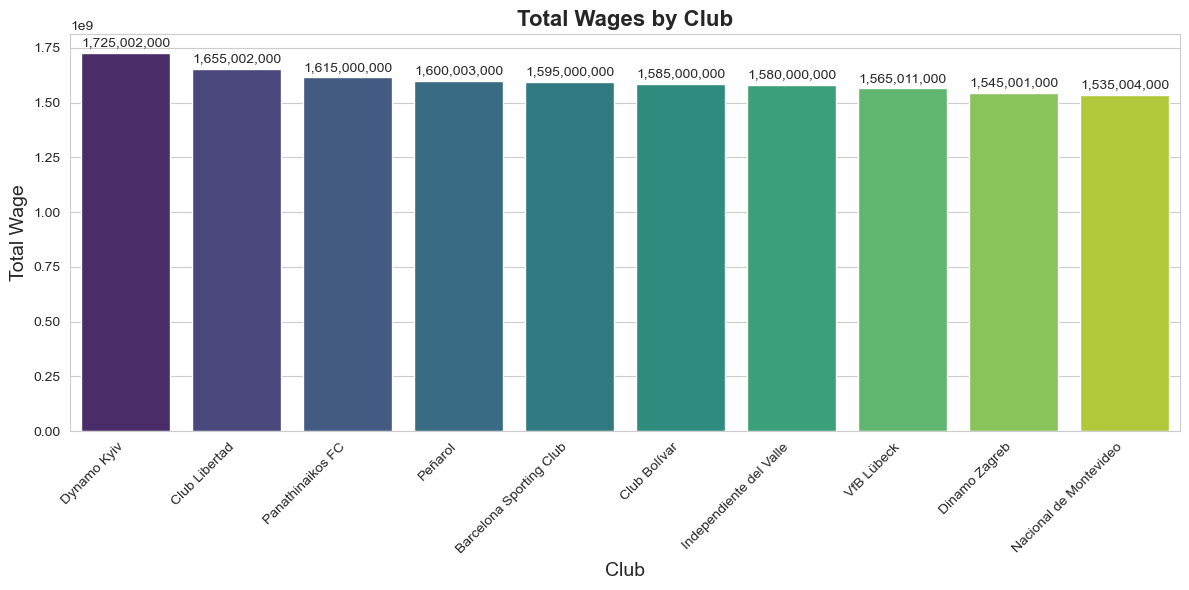

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x=x, y=y, palette='viridis')

plt.title('Total Wages by Club', fontsize=16, weight='bold')
plt.xlabel('Club', fontsize=14)
plt.ylabel('Total Wage', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value annotations on bars
for i, val in enumerate(y):
    plt.text(i, val + max(y)*0.01, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## average amount spend by club on each player

In [82]:
wage_summary = club.sort_values(by='mean', ascending=False)

wage_summary.head(5)

,sum,mean
club,,
Dynamo Kyiv,1.725002e+09,6.160721e+07
Viktoria Plzeň,1.510003e+09,6.040012e+07
Sparta Praha,1.465001e+09,5.860004e+07
Shamrock Rovers,1.385014e+09,5.770892e+07
Panathinaikos FC,1.615000e+09,5.767857e+07


In [83]:
x = list(wage_summary.index[0:10])
y = wage_summary['mean'].values[0 : 10]

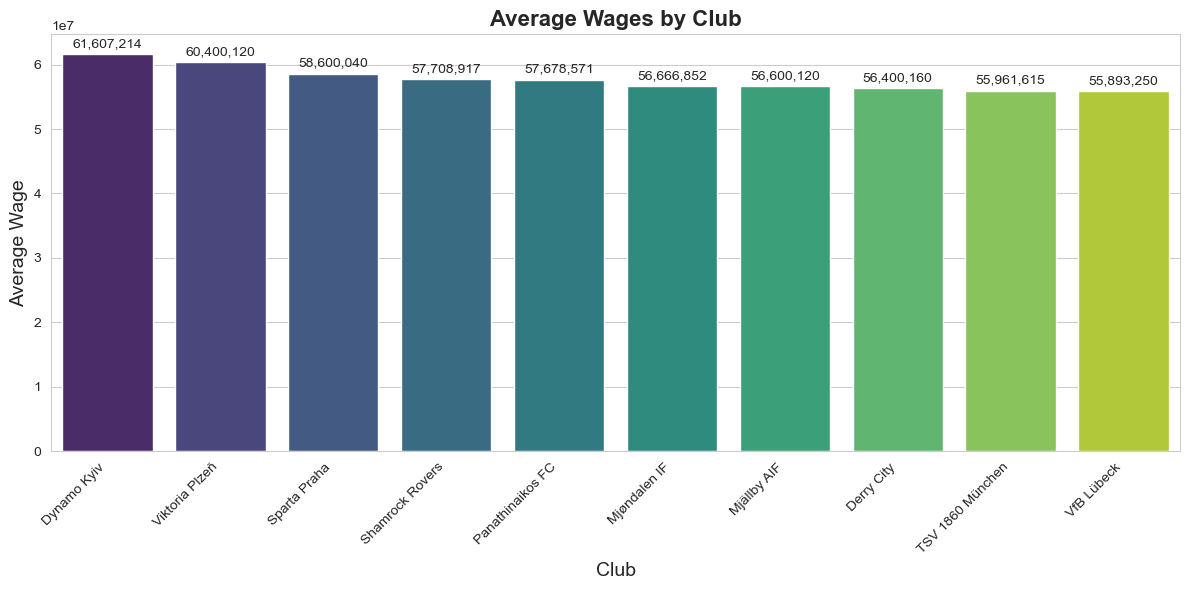

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(x=x, y=y, palette='viridis')

plt.title('Average Wages by Club', fontsize=16, weight='bold')
plt.xlabel('Club', fontsize=14)
plt.ylabel('Average Wage', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value annotations on bars
for i, val in enumerate(y):
    plt.text(i, val + max(y)*0.01, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [85]:
df.head(5)

,longname,nationality,age,ova,pot,club,contract,positions,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,aw,dw,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg,wf_rating,sm_rating,ir_rating,age_group
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",Left,93,RW,2004-07-01,NaN,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,Medium,Low,85,92,91,95,38,65,771,170.0,72.0,4,4,5,Middle Age Players
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",Right,92,ST,2018-07-10,NaN,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,High,Low,89,93,81,89,35,77,562,187.0,83.0,4,5,5,Middle Age Players
2,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,Right,91,GK,2014-07-16,NaN,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,Medium,Medium,87,92,78,90,52,90,150,188.0,87.0,3,1,3,Young Players
3,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",Right,91,CAM,2015-08-30,NaN,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,High,High,76,86,93,88,64,78,207,181.0,70.0,5,4,4,Young Players
4,Neymar da Silva Santos Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",Right,91,LW,2017-08-03,NaN,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,High,Medium,91,85,86,94,36,59,595,175.0,68.0,5,5,5,Young Players


## players expeience till now

In [86]:
from datetime import datetime

In [87]:
curr_year = datetime.now().year

In [88]:
df['experience'] = curr_year - df['joined'].dt.year

In [89]:
df.head(4)

,longname,nationality,age,ova,pot,club,contract,positions,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,aw,dw,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg,wf_rating,sm_rating,ir_rating,age_group,experience
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",Left,93,RW,2004-07-01,NaN,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,Medium,Low,85,92,91,95,38,65,771,170.0,72.0,4,4,5,Middle Age Players,21
1,C Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",Right,92,ST,2018-07-10,NaN,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,High,Low,89,93,81,89,35,77,562,187.0,83.0,4,5,5,Middle Age Players,7
2,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,Right,91,GK,2014-07-16,NaN,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,Medium,Medium,87,92,78,90,52,90,150,188.0,87.0,3,1,3,Young Players,11
3,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",Right,91,CAM,2015-08-30,NaN,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,High,High,76,86,93,88,64,78,207,181.0,70.0,5,4,4,Young Players,10


In [90]:
# Players with min experience of 10 years

player_10_year_exp = df[ df['experience'] >= 10 ]

player_10_year_exp[ [ 'longname', 'experience'] ]

,longname,experience
0,Lionel Messi,21
2,Jan Oblak,11
3,Kevin De Bruyne,10
5,Robert Lewandowski,11
9,MarcAndr ter Stegen,11
...,...,...
18390,Jack Stevens,11
18416,Basil Al Bahrani,12
18781,Sean Callan,10
18915,Tailang ChenZeng,10
